<a href="https://colab.research.google.com/github/Nourankh20/Data-Visualization/blob/nouran/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/Nourankh20/Data-Visualization/main/datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../datasets/{dataset_name}'


In [55]:
athlete_events_df =  pd.read_csv(get_path('athlete_events.csv'))

In [56]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [57]:
noc_regions = pd.read_csv(get_path('noc_regions.csv'))

In [58]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


#Merging the 2 datasets into one dataset called df

In [7]:
df = pd.merge(athlete_events_df,noc_regions,left_on='NOC',right_on='NOC')

In [8]:
df.head()
df = df.drop_duplicates()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [9]:
null_values_percentages = df.isna().sum()/len(df) *100
null_values_percentages

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453460
Height    21.800269
Weight    22.806646
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.239177
region     0.007796
notes     98.130907
dtype: float64

# Dealing with outliers in Height


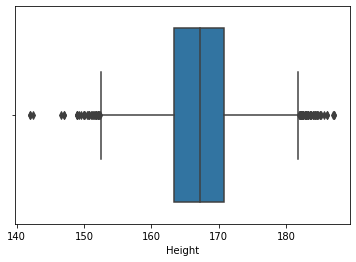

In [10]:
import seaborn as sns

Females= df[df['Sex']=='F']
Males=df[df['Sex']=='M']


sports_height_females = Females.groupby(['Sport','region'])['Height'].mean()
sports_height_males = Males.groupby(['Sport','region'])['Height'].mean()


dropped_null_values_height_females = sports_height_females.dropna(how='all')
dropped_null_values_height_females.values

dropped_null_values_height_males = sports_height_males.dropna(how='all')
dropped_null_values_height_males

ay = sns.boxplot(x=dropped_null_values_height_females)




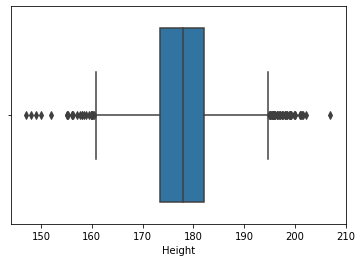

In [11]:
ay = sns.boxplot(x=dropped_null_values_height_males)


In [12]:
#Removed outliers in female height

Q1 = np.percentile(dropped_null_values_height_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1


Females = Females[~(Females['Height'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Height'] <= (Q1-1.5*IQR))]




#Removed outliers in male height

Q1 = np.percentile(dropped_null_values_height_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Height'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Height'] <= (Q1-1.5*IQR))]




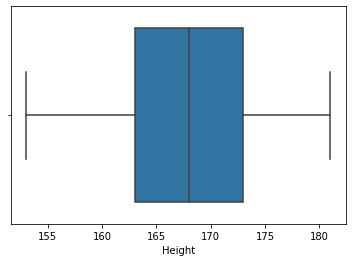

In [13]:
ax = sns.boxplot(x=Females['Height'])


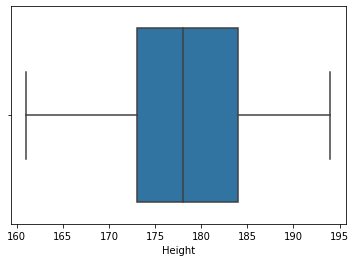

In [14]:
ax = sns.boxplot(x=Males['Height'])


ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.797316
Height    28.044054
Weight    29.105307
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.812931
region     0.007046
notes     97.894840
dtype: float64

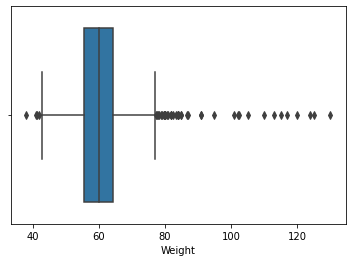

In [15]:

sports_weight_females = Females.groupby(['Sport', 'region'])['Weight'].mean()
sports_weight_males = Males.groupby(['Sport', 'region'])['Weight'].mean()


dropped_null_values_weight_females = sports_weight_females.dropna(how='all')
dropped_null_values_weight_females.values

dropped_null_values_weight_males = sports_weight_males.dropna(how='all')
dropped_null_values_weight_males


ay = sns.boxplot(x=dropped_null_values_weight_females)

Males.isna().sum()/len(Males) *100



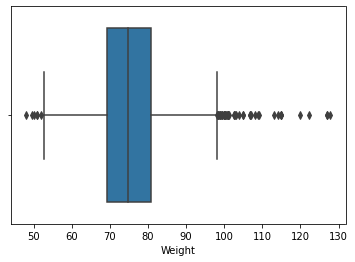

In [16]:
ay = sns.boxplot(x=dropped_null_values_weight_males)



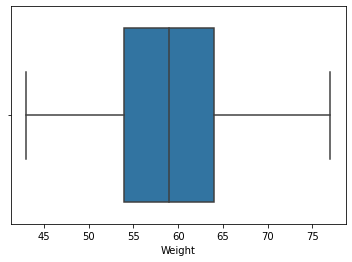

In [17]:

#Removed outliers in female weight

Q1 = np.percentile(dropped_null_values_weight_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Females = Females[~(Females['Weight'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Weight'] <= (Q1-1.5*IQR))]


#Removed outliers in male weight

Q1 = np.percentile(dropped_null_values_weight_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Weight'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Weight'] <= (Q1-1.5*IQR))]

ay = sns.boxplot(x=Females['Weight'])



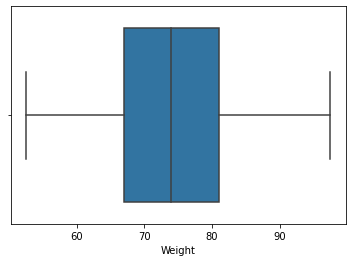

In [18]:
ay = sns.boxplot(x=Males['Weight'])


In [19]:
Males.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN


In [20]:
Males['Weight']
Males.isna().sum()/len(Males) *100


ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.946647
Height    28.954285
Weight    30.157812
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.928339
region     0.007301
notes     97.869258
dtype: float64

In [21]:
#Male height nan
height = Males[(Males['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]  
    region = row[15] 
    new_height = dropped_null_values_height_males[(dropped_null_values_height_males.index.get_level_values(1) == region) 
    & (dropped_null_values_height_males.index.get_level_values(0) == sport)  ].values

    if len(new_height) > 0 :
      Males.loc[index,['Height']] = new_height[0]



In [22]:
Males.isna().sum()/len(Males)  *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.946647
Height     1.275413
Weight    30.157812
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.928339
region     0.007301
notes     97.869258
dtype: float64

In [23]:
Males

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.000000,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.000000,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.000000,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
6,3605,An Weijiang,M,22.0,178.000000,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN
7,3605,An Weijiang,M,22.0,178.000000,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270753,109447,Bothloko Shebe,M,20.0,178.000000,65.0,Lesotho,LES,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 100 metres,NaN,Lesotho,NaN
270754,109447,Bothloko Shebe,M,20.0,178.000000,65.0,Lesotho,LES,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 200 metres,NaN,Lesotho,NaN
270758,116595,Inkululeko Suntele,M,22.0,165.857143,NaN,Lesotho,LES,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,Lesotho,NaN
270765,122215,Lefa Tsapi,M,23.0,170.000000,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [24]:
#Male weight
weight = Males[(Males['Weight'].isna())]
for index, row in weight.iterrows():
    sport = row[12]  
    region = row[15] 
    new_weight = dropped_null_values_weight_males[(dropped_null_values_weight_males.index.get_level_values(1) == region) 
    & (dropped_null_values_weight_males.index.get_level_values(0) == sport)  ].values
    
    if len(new_weight) > 0 :
      Males.loc[index,['Weight']] = new_weight[0]




In [25]:
Males.isna().sum()/len(Males) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.946647
Height     1.275413
Weight     1.491632
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.928339
region     0.007301
notes     97.869258
dtype: float64

In [26]:
#Female height
height = Females[(Females['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]  
    region = row[15] 
    new_height = dropped_null_values_height_females[(dropped_null_values_height_females.index.get_level_values(1) == region) 
    & (dropped_null_values_height_females.index.get_level_values(0) == sport)].values

    if len(new_height) > 0 :
      Females.loc[index,['Height']] = new_height[0]

Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.600720
Height     0.773887
Weight    11.528618
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.567389
region     0.010727
notes     98.712742
dtype: float64

In [27]:
#Female weight
weight = Females[(Females['Weight'].isna())]
for index, row in weight.iterrows():
    sport = row[12]  
    region = row[15] 
    new_weight = dropped_null_values_weight_females[(dropped_null_values_weight_females.index.get_level_values(1) == region) 
    & (dropped_null_values_weight_females.index.get_level_values(0) == sport)  ].values
    
    if len(new_weight) > 0 :
      Females.loc[index,['Weight']] = new_weight[0]


Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.600720
Height     0.773887
Weight     0.864302
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.567389
region     0.010727
notes     98.712742
dtype: float64

In [28]:
frames = [Females, Males]
Olympics_data_cleaned = pd.concat(frames)
Olympics_data_cleaned.isna().sum()/len(Olympics_data_cleaned) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.781107
Height     1.140908
Weight     1.323387
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.831535
region     0.008220
notes     98.095473
dtype: float64

In [29]:
# Function to map country to city
def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


# Applying this function
Olympics_data_cleaned ['Host_Country'] = Olympics_data_cleaned['City'].apply(host_country)
Olympics_data_cleaned.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,Brazil
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,Brazil
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,United States of America
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,NaN,China,NaN,Australia
20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN,United Kingdom


In [30]:
medals = Olympics_data_cleaned.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

medals['Is_Host'] = np.where(medals['Host_Country'] == medals['region'],1,0)
medals['Total Medals'] = medals['Bronze'] + medals['Silver'] + medals['Gold']
medals.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
0,1896,Greece,Australia,1,2,0,0,3
1,1896,Greece,Austria,2,2,1,0,5
2,1896,Greece,Denmark,3,1,2,0,6
3,1896,Greece,France,2,5,4,0,11
4,1896,Greece,Germany,2,21,5,0,28


#Getting the number of medals each Region has

In [31]:
total_medals = Olympics_data_cleaned.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

total_medals['Total'] = total_medals['Bronze'] + total_medals['Silver'] + total_medals['Gold']

total_medals = total_medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)
total_medals

Medal,Bronze,Silver,Gold,Total
region,,,,
USA,1127,1383,2133,4643
Germany,1100,1064,1098,3262
Russia,943,940,1334,3217
UK,614,690,615,1919
France,618,544,462,1624
...,...,...,...,...
Guyana,1,0,0,1
Iraq,1,0,0,1
Jordan,0,0,1,1


#Representing the top 10 countries when they are the host in comparison to when they not


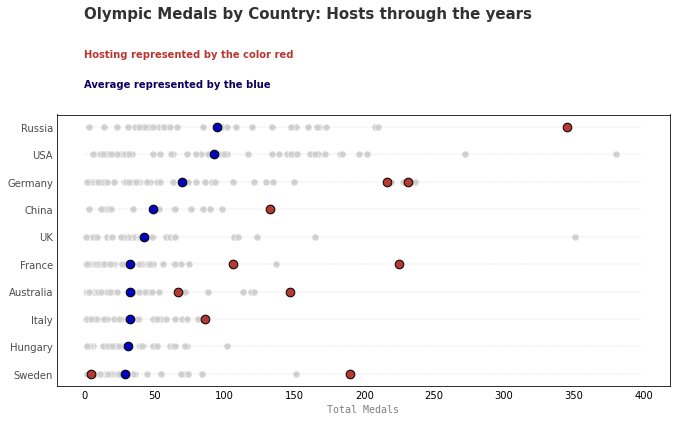

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(11, 5))


# top 10
top_list_ = medals.groupby('region')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:10].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['region']:
    mean = medals[medals['region'] == country].groupby('region')['Total Medals'].mean()

    # historic scores
    sns.scatterplot(data=medals[medals['region'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)

    # mean score
    sns.scatterplot(data=medals[medals['region'] == country], y=plot, x=mean,color='#0000c0',ec='black',linewidth=1,s=75,ax=ax)
    
    # Hosting score
    sns.scatterplot(data=(medals[(medals['region'] == country) & (medals['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['region'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',color='gray')

ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)




ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',color='#323232')
ax.text(0,Yend+2.1, 'Hosting represented by the color red', fontsize=10,fontweight='bold',color='#B73832')
ax.text(0,Yend+1, 'Average represented by the blue', fontsize=10,fontweight='bold',color='#0c005f')


plt.show()



In [33]:
df = pd.merge(athlete_events_df,noc_regions,left_on='NOC',right_on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [34]:
# Function to map country to city
def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "UK"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "USA"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    elif col == "Budapest":
        return "Hungary"
    else:
        return "Other"


# Applying this function
df ['Host_Country'] = df['City'].apply(host_country)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,UK
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,Australia
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,Greece
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,Brazil


In [35]:
medals = df.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

medals['Is_Host'] = np.where(medals['Host_Country'] == medals['region'],1,0)
medals['Total Medals'] = medals['Bronze'] + medals['Silver'] + medals['Gold']
medals.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
0,1896,Greece,Australia,1,2,0,0,3
1,1896,Greece,Austria,2,2,1,0,5
2,1896,Greece,Denmark,3,1,2,0,6
3,1896,Greece,France,2,5,4,0,11
4,1896,Greece,Germany,2,25,5,0,32


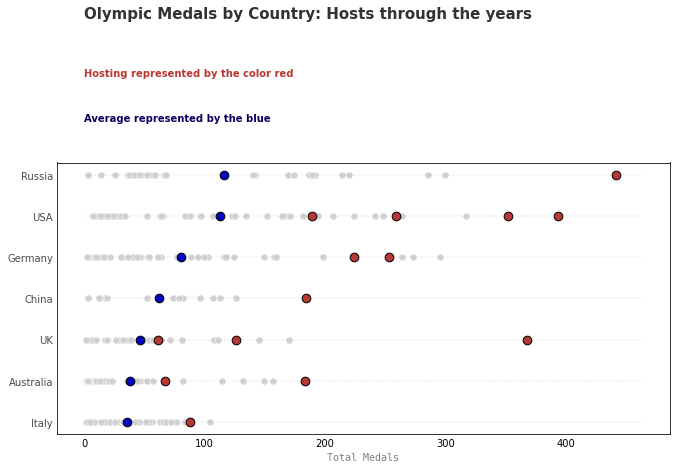

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(11, 5))


# top 7
top_list_ = medals.groupby('region')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:7].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['region']:
    mean = medals[medals['region'] == country].groupby('region')['Total Medals'].mean()

    # historic scores
    sns.scatterplot(data=medals[medals['region'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)

    # mean score
    sns.scatterplot(data=medals[medals['region'] == country], y=plot, x=mean,color='#0000c0',ec='black',linewidth=1,s=75,ax=ax)
    
    # Hosting score
    sns.scatterplot(data=(medals[(medals['region'] == country) & (medals['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['region'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',color='gray')

ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)




ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',color='#323232')
ax.text(0,Yend+2.1, 'Hosting represented by the color red', fontsize=10,fontweight='bold',color='#B73832')
ax.text(0,Yend+1, 'Average represented by the blue', fontsize=10,fontweight='bold',color='#0c005f')


plt.show()



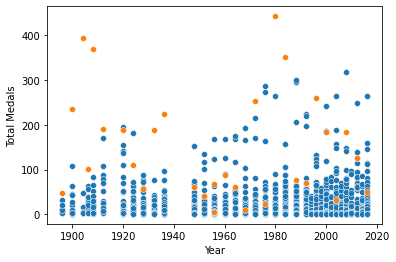

In [37]:
not_host = medals[medals['Is_Host'] == 0]
host = medals[medals['Is_Host'] == 1]

sns.scatterplot(x = not_host['Year'] , y = not_host['Total Medals'])
sns.scatterplot( x = host['Year'] , y = host['Total Medals'])


In [38]:
host_list = list(medals.query("Is_Host == 1")['Host_Country'].value_counts().index)

medals['Total_Medals_NaturalLog'] = np.log(medals['Total Medals'])

Not_hosting_samples = medals[medals['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].count()
hosting_samples = medals[medals['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].count()

Not_hosting_mean = medals[medals['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].mean()
hosting_mean = medals[medals['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].mean()

Not_hosting_std = medals[medals['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'].std()
hosting_std = medals[medals['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'].std()

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


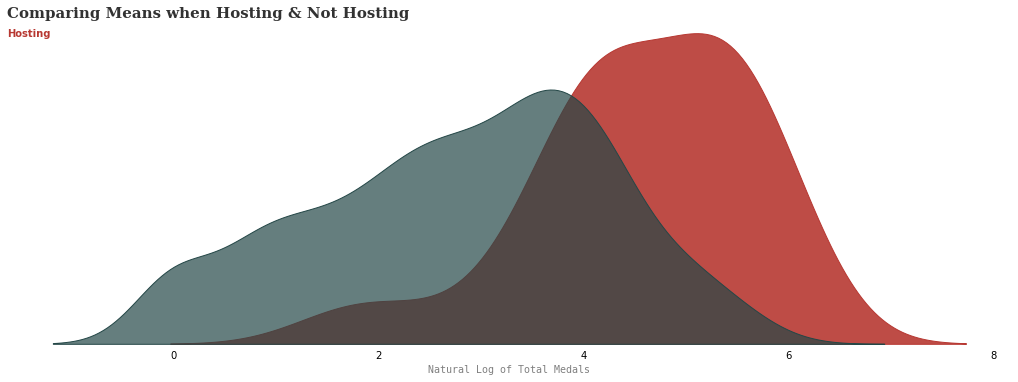

In [39]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
sns.kdeplot(data=medals[medals['region'].isin(host_list)].query("Is_Host == 1"), x='Total_Medals_NaturalLog',shade=True,color='#B73832',alpha=0.9, ax=ax)
sns.kdeplot(data=medals[medals['region'].isin(host_list)].query("Is_Host == 0"), x='Total_Medals_NaturalLog', shade=True, color='#244747',alpha=0.7, ax=ax)





for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel("Natural Log of Total Medals",fontfamily='monospace',color='gray')
ax.get_yaxis().set_visible(False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend, 'Comparing Means when Hosting & Not Hosting', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend-0.02, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')



plt.show()

In [40]:
Gold = Olympics_data_cleaned[Olympics_data_cleaned['Medal'] == 'Gold']
Gold_female = Gold[Gold['Sex'] == 'F']
Gold_male = Gold[Gold['Sex'] == 'M']

mean_gold_female_height = Gold_female.groupby(['Sport','region'])['Height'].mean().values
mean_gold_female_weight = Gold_female.groupby(['Sport','region'])['Weight'].mean().values

mean_gold_male_height = Gold_male.groupby(['Sport','region'])['Height'].mean().values
mean_gold_male_weight = Gold_male.groupby(['Sport','region'])['Weight'].mean().values

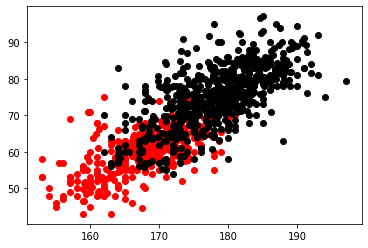

In [41]:
# plt.plot( np.arange(len(mean_gold_female_height.values)),mean_gold_female_height)
# plt.plot( np.arange(len(mean_gold_female_weight.values)),mean_gold_female_weight)
plt.scatter(mean_gold_female_height,mean_gold_female_weight, c= 'red')

plt.scatter(mean_gold_male_height,mean_gold_male_weight, c= 'black')



In [42]:
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure


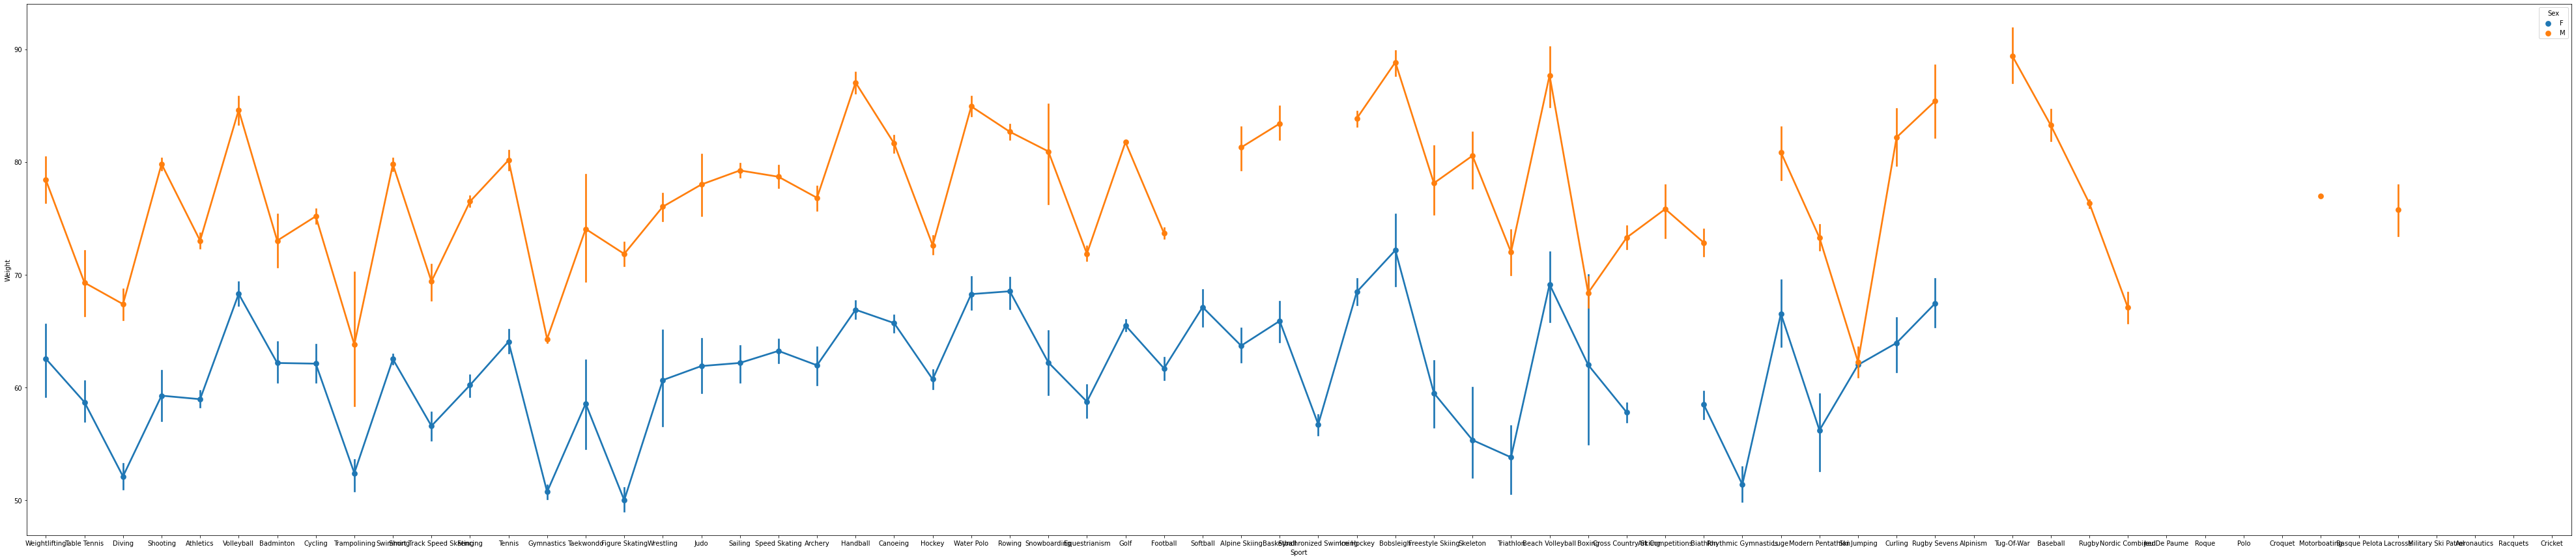

In [43]:
# Gold = Gold.drop( columns = ['ID'])
plt.figure(figsize=(70,15))
# g = sns.catplot(x="region", y="Sport", data=Gold_female)
ax = sns.pointplot(x="Sport", y="Weight", hue="Sex",
                   data=Gold)


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


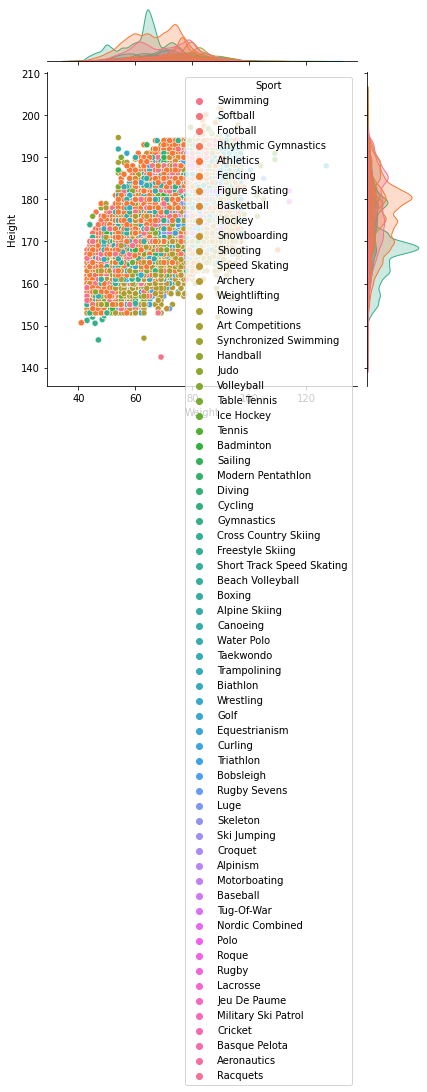

In [44]:
sns.jointplot(data=Olympics_data_cleaned, x="Weight", y="Height", hue="Sport")

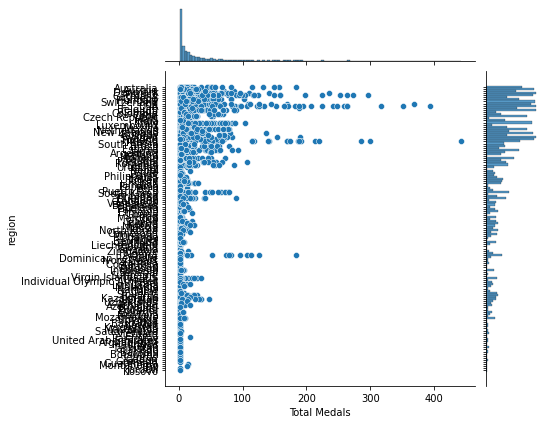

In [45]:
sns.jointplot(x="Total Medals", y="region", data=medals)

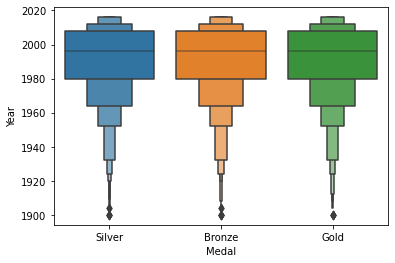

In [46]:
ax = sns.boxenplot(x="Medal", y="Year", data=Females)


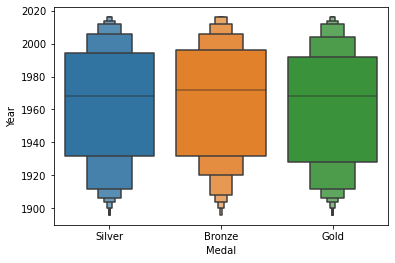

In [47]:

ax = sns.boxenplot(x="Medal", y="Year", data=Males)

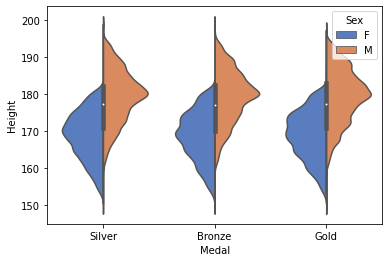

In [48]:
ax = sns.violinplot(x="Medal", y="Height", hue="Sex",
                    data=Olympics_data_cleaned, palette="muted", split=True)

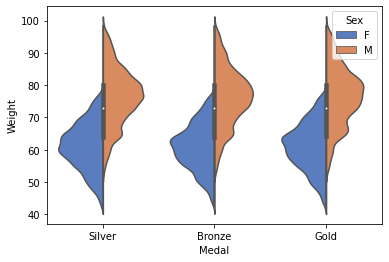

In [49]:
ax = sns.violinplot(x="Medal", y="Weight", hue="Sex",
                    data=Olympics_data_cleaned, palette="muted", split=True)

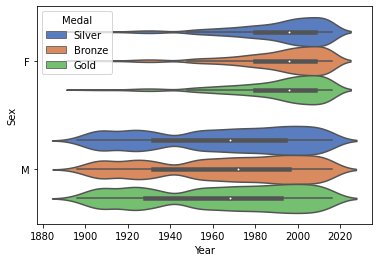

In [50]:
ax = sns.violinplot(x="Year", y="Sex", hue="Medal", scale="width",
                    data=Olympics_data_cleaned, palette="muted")

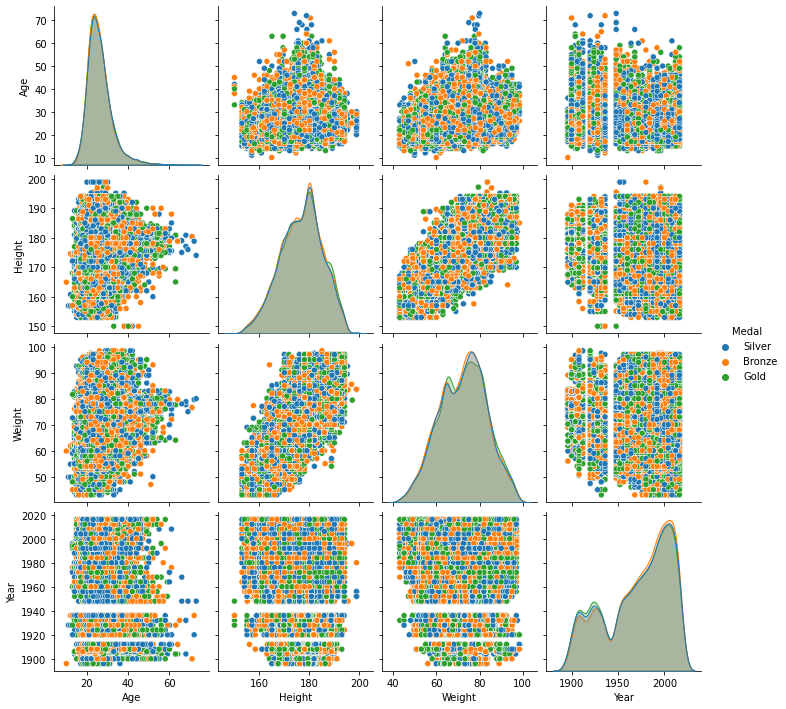

In [51]:
no_id = Olympics_data_cleaned.drop(columns=['ID'])
sns.pairplot(no_id, hue="Medal")

In [52]:
 medals

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals,Total_Medals_NaturalLog
0,1896,Greece,Australia,1,2,0,0,3,1.098612
1,1896,Greece,Austria,2,2,1,0,5,1.609438
2,1896,Greece,Denmark,3,1,2,0,6,1.791759
3,1896,Greece,France,2,5,4,0,11,2.397895
4,1896,Greece,Germany,2,25,5,0,32,3.465736
...,...,...,...,...,...,...,...,...,...
1641,2016,Brazil,Bahrain,0,1,1,0,2,0.693147
1642,2016,Brazil,Grenada,0,0,1,0,1,0.000000
1643,2016,Brazil,Fiji,0,13,0,0,13,2.564949
1644,2016,Brazil,Jordan,0,1,0,0,1,0.000000


In [53]:
Females

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,1464,Ai Yanhan,F,14.0,168.000000,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.000000,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
12,3611,An Zhongxin,F,23.0,170.000000,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN
13,3611,An Zhongxin,F,27.0,170.000000,65.0,China,CHN,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,NaN,China,NaN
20,6847,Bai Anqi,F,19.0,164.000000,59.0,China,CHN,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270756,109961,Lineo Florence Shoai,F,17.0,150.666667,41.0,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
270757,109961,Lineo Florence Shoai,F,21.0,150.666667,41.0,Lesotho,LES,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 200 metres,NaN,Lesotho,NaN
270760,119487,Likeleli Alinah Thamae,F,22.0,170.000000,49.0,Lesotho,LES,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Flyweight,NaN,Lesotho,NaN
270761,119563,Masempe Theko,F,25.0,NaN,NaN,Lesotho,LES,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 50 metres Freestyle,NaN,Lesotho,NaN


In [159]:
# medals.first_valid_index()
gold = Olympics_data_cleaned[Olympics_data_cleaned['Medal']=='Gold']
grouped = gold.groupby(['region']).first()
grouped



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,notes,Host_Country
region,,,,,,,,,,,,,,,,,
Algeria,14046,Hassiba Boulmerka,F,24.0,158.0,49.0,Algeria,ALG,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,None,Spain
Argentina,18500,Cecilia Carranza Saroli,F,29.0,164.0,63.0,Argentina,ARG,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Mixed Multihull,Gold,None,Brazil
Armenia,84861,Armen Lyudvikovich Nazaryan,M,22.0,162.0,60.0,Armenia,ARM,1996 Summer,1996,Summer,Atlanta,Wrestling,"Wrestling Men's Flyweight, Greco-Roman",Gold,None,United States of America
Australia,2850,"Kate Ruth ""Katie"" Allen",F,26.0,170.0,65.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Women's Hockey,Gold,Australasia,Australia
Austria,2849,"Katherine Jessie Jean ""Kate"" Allen (-Diechtler)",F,34.0,163.0,53.0,Austria,AUT,2004 Summer,2004,Summer,Athina,Triathlon,Triathlon Women's Olympic Distance,Gold,None,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,4042,Jos Leandro Andrade,M,22.0,179.0,77.0,Uruguay,URU,1924 Summer,1924,Summer,Paris,Football,Football Men's Football,Gold,None,France
Uzbekistan,20535,Lina Anatolyevna Cheryazova,F,25.0,164.0,60.0,Uzbekistan,UZB,1994 Winter,1994,Winter,Lillehammer,Freestyle Skiing,Freestyle Skiing Women's Aerials,Gold,None,Other
Venezuela,69930,Rubn Daro Limardo Gascn,M,26.0,175.0,75.0,Venezuela,VEN,2012 Summer,2012,Summer,London,Fencing,"Fencing Men's epee, Individual",Gold,None,United Kingdom


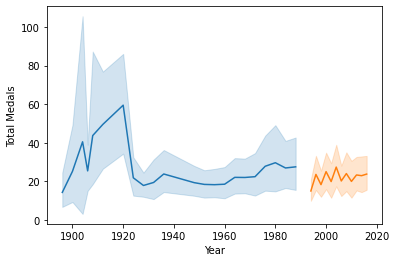

In [163]:



total = [host, not_host]
total_m = pd.concat(total)

first_gold_japan = grouped[grouped.index == 'Algeria'].Year.values[0]


before_gold_japan = total_m[total_m['Year'] < first_gold_japan] 
after_gold_japan = total_m[total_m['Year'] > first_gold_japan] 

sns.lineplot(x="Year", y="Total Medals",data=before_gold_japan)
sns.lineplot(x="Year", y="Total Medals",data=after_gold_japan)

